In [1]:
'''
Test notebook to do the import by filesnames and not by creation date
'''

'\nTest notebook to do the import by filesnames and not by creation date\n'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from osgeo import gdal
import os
import xarray as xr
import pickle
from netCDF4 import Dataset

In [3]:
#create dictionary
data_dict = {}

#names of simulations
name_list = ['az']

#create parameter list
parameters = [
"topographic__elevation",
"soil__depth",
"sediment__flux",
"landform__ID",
"precipitation",
"landform__ID",
"erosion__rate",
"vegetation__density",
'slope_degrees',
'tree_fpc',
'grass_fpc',
'shrub_fpc'
]

for name in name_list:
    data_dict[name] = {}
    for p in parameters:
        data_dict[name][p] = []

path = '../../../simulations_results/'
path_to_output = '/ll_output/NC'

path_list = []
for name in name_list:
    path_list.append(os.path.join(path + name + path_to_output))

In [4]:
path_list

['../../../simulations_results/az/ll_output/NC']

In [5]:
elapsed_time_start = 4900000
elapsed_time_end   = 4923000
dt                 = 100
output_start       = 49000
output_end         = 49230
output_array       = np.arange(output_start, output_end, 1)
elapsed_time_array = np.arange(elapsed_time_start, elapsed_time_end, dt)

In [6]:
counter = 0
for name,simu in zip(name_list,path_list):
    for elapsed, output in zip(elapsed_time_array, output_array):

        nc_file_path = os.path.join(simu + f'/output{elapsed}__{output}.nc')
        _dataDump = Dataset(nc_file_path)
        counter += 1

        if counter % 100 == 0:
            print('100 files done')


        for p in parameters:
            _cutDump = _dataDump.variables[p][:][0]
            #delete boundary nodes
            _cutDump = np.delete(_cutDump, 0 , axis = 0) 
            _cutDump = np.delete(_cutDump,-1 , axis = 0)
            _cutDump = np.delete(_cutDump, 0 , axis = 1)
            _cutDump = np.delete(_cutDump,-1 , axis = 1)

            data_dict[name][p].append(_cutDump)


        #print(f'output{elapsed}__{output}.nc')

100 files done
100 files done


In [13]:
topo_mean = [np.mean(topo) for topo in data_dict['az']['tree_fpc'][:]]

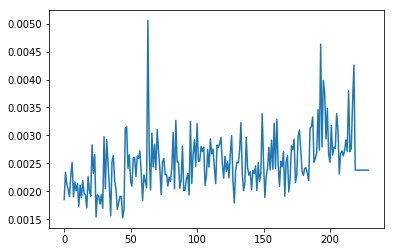

In [14]:
plt.plot(topo_mean)